#  Normality Test <hr style="border:2.5px solid #5f056b"></hr>

<b><i>Rica Galagate</i></b>
<br>Computer Engineer/Technician</br>

In [32]:
# imports and packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Shapiro-Wilk Test

In [33]:
# load dataset
df = pd.read_csv(r"CSV_files-Endterm\defects-30-sample.csv",
                 delimiter=",",
                 index_col="Sample")
df

,Defects
Sample,
1,13
2,12
3,10
4,11
5,10
6,6
7,12
8,12
9,9


In [34]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Defects  30 non-null     int64
dtypes: int64(1)
memory usage: 480.0 bytes


In [35]:
# summary of statistics
df.describe()

,Defects
count,30.000000
mean,11.033333
std,2.566137
min,5.000000
25%,9.250000
50%,11.500000
75%,13.000000
max,15.000000


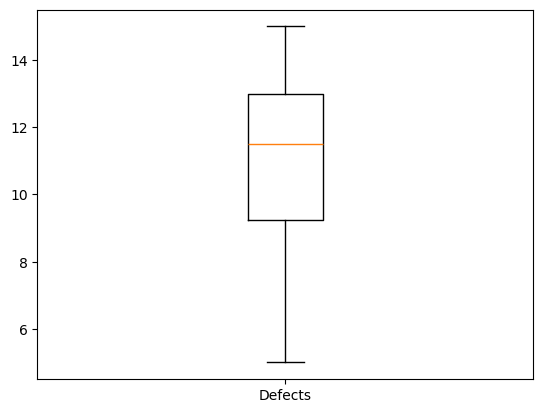

In [36]:
# check for outliers
plt.boxplot(df['Defects'],tick_labels=['Defects'])
plt.show()

In [37]:
# shapiro-wilk test
w_stat, p_value = stats.shapiro(df['Defects'])

print(f'w_stat: {w_stat:.4f}')
print(f'p_value: {p_value:.4f}')

w_stat: 0.9580
p_value: 0.2757


In [38]:
# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("Non-normal data")
else:
    # fail to reject null hypothesis
    print("Normal data")

Normal data


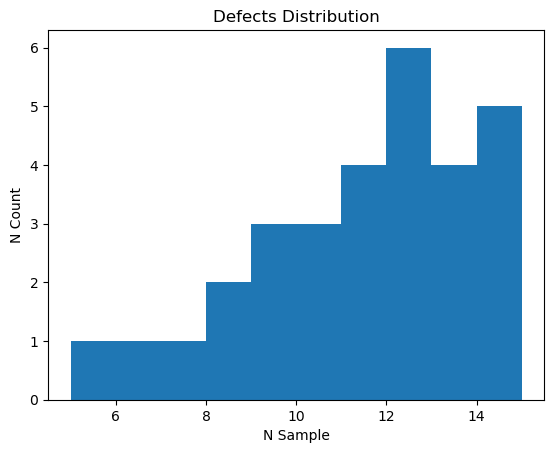

In [39]:
# defects distribution
plt.hist(df['Defects'])
plt.title('Defects Distribution')
plt.ylabel('N Count')
plt.xlabel('N Sample')
plt.show()

# Aderson-Darling Test

In [40]:
# load dataset
df = pd.read_csv(r"CSV_files-Endterm\defects-count.csv",
                 delimiter=",",
                 index_col="Product")
df

,Defects
Product,
1,12
2,8
3,9
4,11
5,9
...,...
316,15
317,10
318,8


In [41]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 1 to 320
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Defects  320 non-null    int64
dtypes: int64(1)
memory usage: 5.0 KB


In [42]:
# summary of statistics
df.describe()

,Defects
count,320.000000
mean,10.325000
std,3.172274
min,1.000000
25%,8.000000
50%,11.000000
75%,12.000000
max,18.000000


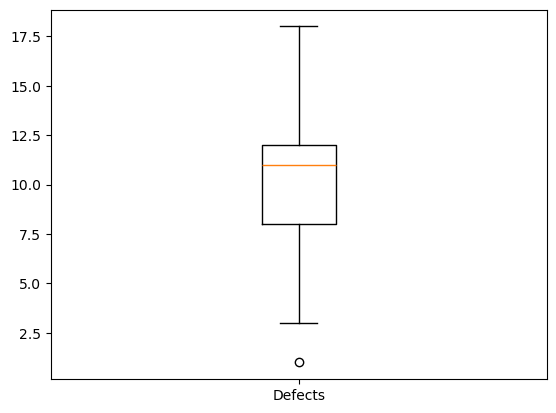

In [43]:
# check for outliers
plt.boxplot(df['Defects'],tick_labels=['Defects'])
plt.show()

In [44]:
# removing 3-sigma outliers
z = stats.zscore(df['Defects'])
outliers = (z<-3)|(z>3)
df = df[~outliers]

In [45]:
# anderson-darling statistics
a2_stat, critical, alpha = stats.anderson(df['Defects'])

print(f'a2_stat: {a2_stat:.4f}')
print(f'critical: {critical}')
print(f'alpha: {alpha}')

a2_stat: 1.6942
critical: [0.569 0.648 0.777 0.907 1.079]
alpha: [15.  10.   5.   2.5  1. ]


In [46]:
# verdict
# let alpha = 0.05
if a2_stat > critical[2]:
    # reject null hypothesis
    print("Non-normal data")
else:
    # fail to reject null hypothesis
    print("Normal data")

Non-normal data


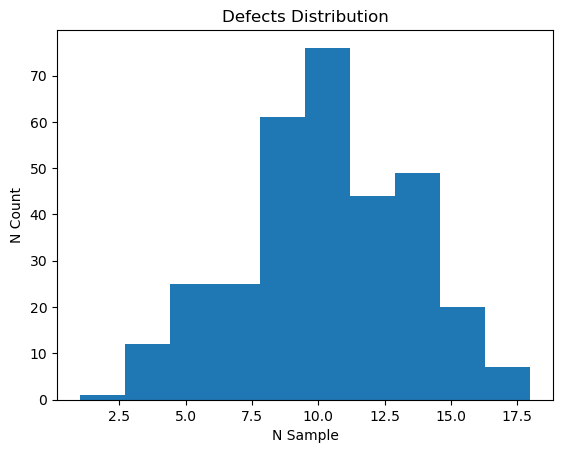

In [47]:
# defects distribution
plt.hist(df['Defects'])
plt.title('Defects Distribution')
plt.ylabel('N Count')
plt.xlabel('N Sample')
plt.show()